<a href="https://colab.research.google.com/github/MominaGull/ML-Practice-Projects/blob/main/Image_Compare.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import the necessary packages
from skimage.measure import compare_ssim
import imutils
import cv2
from PIL import Image
from google.colab.patches import cv2_imshow

In [ ]:
# Load the two input images
imageA = cv2.imread("one.jpg")
imageB = cv2.imread("two.jpg")

# Convert the images to grayscale
grayA = cv2.cvtColor(imageA, cv2.COLOR_BGR2GRAY)
grayB = cv2.cvtColor(imageB, cv2.COLOR_BGR2GRAY)

In [ ]:
# Change the dimensions of the two image so they are of same dimensions

(height1,width1) = grayA.shape
(height2,width2) = grayB.shape

if (height1 > height2):
  height = height1
else:
  height = height2

if (width1 > width2):
  width = width1
else:
  width = width2

image_A = cv2.resize(grayA, (width, height)) 
image_B = cv2.resize(grayB, (width, height))

# Compute the Structural Similarity Index (SSIM) between the two images, ensuring that the difference image is returned

(score, diff) = compare_ssim(image_A, image_B, full=True)
diff = (diff * 255).astype("uint8")
print("SSIM: {}".format(score))

SSIM: 0.30064322447327824


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.


In [ ]:
if (score < 0.3):
  print("Accident\nTrue")
else:
  print("No Accident\nFalse")

No Accident
False


In [ ]:
# Threshold the difference image, followed by finding contours to obtain the regions of the two input images that differ
thresh = cv2.threshold(diff, 0, 255,
	cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,
	cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

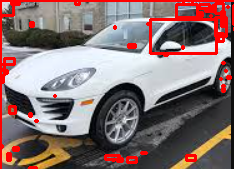

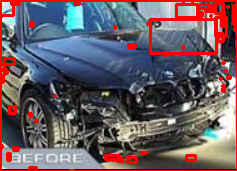

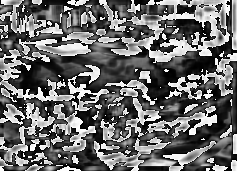

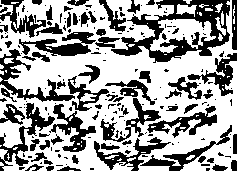

In [ ]:
# Loop over the contours
for c in cnts:
	# Compute the bounding box of the contour and then draw the
	# bounding box on both input images to represent where the two
	# images differ
	(x, y, w, h) = cv2.boundingRect(c)
	cv2.rectangle(imageA, (x, y), (x + w, y + h), (0, 0, 255), 2)
	cv2.rectangle(imageB, (x, y), (x + w, y + h), (0, 0, 255), 2)
# Show the output images
cv2_imshow(imageA)
cv2_imshow(imageB)
cv2_imshow(diff)
cv2_imshow(thresh)